**DCGAN - Deep Convolutional GAN**

In [ ]:
# Importing the Libraries
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.12.0'

**Loading  and preprocessing the DataSet**

The left side of the assignment destructures the returned tuples from load_data().X_train: This is the training dataset containing the images of the handwritten digits. It will be a NumPy array of shape (60000, 28, 28) where 60,000 is the number of training samples, and 28x28 is the resolution of each image. y_train: This is the training labels corresponding to X_train. It contains the digit labels (0-9) for each image, with shape (60000). (,): This part is used to ignore the test data. The underscore () is a convention to signify that the value is being ignored. So, you're not storing X_test and y_test in this case.



In [ ]:
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
28*28

784

In [ ]:
y_train.shape

(60000,)

8


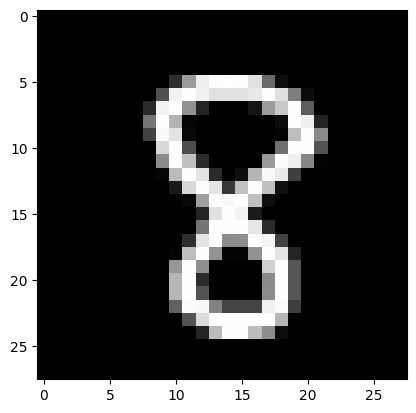

In [ ]:
i=np.random.randint(0,60000)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray');

In [ ]:
# Converting the Data into the float format
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# Checking the range of the data for Normalization
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [ ]:
# Normalize the Data
X_train = (X_train - 127.5) / 127.5

In [ ]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [ ]:
buffer_size = 60000
batch_size = 256

In [ ]:
buffer_size / batch_size  # mini batch

234.375

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

This code transforms X_train (which is typically a large dataset) into a tf.data.Dataset object, shuffles the data with a buffer size of buffer_size, and groups it into batches of size batch_size for efficient training. This is a typical preprocessing step before feeding data into a TensorFlow model.



In [ ]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
#100 -> 12544

def build_generator():
  network = tf.keras.Sequential()

  network.add(layers. Dense (units = 7*7*256, use_bias= False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers. LeakyReLU())

  network.add(layers. Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters=128, kernel_size = (5,5), padding='same', strides=(2,2), use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters=64, kernel_size = (5,5), padding='same', strides=(2,2), use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(filters=1, kernel_size = (5,5), padding='same', strides=(2,2), use_bias=True, activation='tanh'))

  network.summary()

  return network

In [ ]:
generator = build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)      5

In [ ]:
generator.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_input')>

In [ ]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.28464732,  1.6723169 ,  0.2403562 , -0.9389317 ,  0.49295473,
        -0.94932824,  0.92141026,  0.70028216,  0.42925316,  1.2812542 ,
        -0.5450141 ,  0.2540265 ,  2.150626  ,  1.1717647 , -0.83346653,
        -0.01317661, -0.01008501, -0.9262376 ,  0.02503089,  0.31272426,
        -0.4844633 , -0.94406486,  2.540205  ,  0.30743414, -0.07804174,
         0.47923857, -0.14668782,  0.92752224,  0.76146036, -0.06720918,
         1.1989766 ,  0.193221  ,  0.07535724,  0.81730443, -0.55667335,
        -2.447123  , -0.37303758,  1.0216801 ,  1.1598657 ,  1.9240233 ,
        -0.1842196 , -0.24072646,  2.7446394 , -0.9112393 , -0.01234921,
         0.1092433 ,  0.8420447 , -0.766748  ,  0.22054048, -0.6647078 ,
        -1.3106668 ,  1.027128  ,  0.04469293, -0.19392823, -0.34937167,
        -0.3873018 ,  0.494377  ,  0.41571602,  0.2705907 , -1.3007131 ,
        -0.12560272,  0.3378023 ,  1.00995   ,  0.86110234,  0.49588618,
 

In [ ]:
generated_image = generator(noise, training=False)

In [ ]:
generated_image.shape

TensorShape([1, 56, 56, 1])

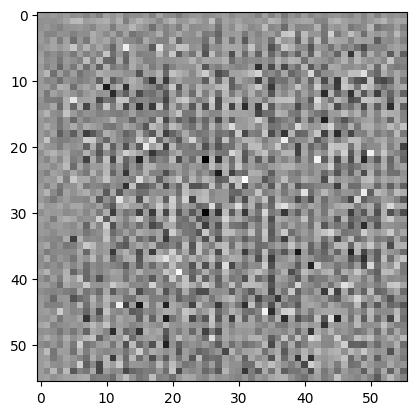

In [ ]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray');

**Building the Discriminator**

Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
Conv2d x Conv2dTranspose: https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d

In [ ]:
def build_discriminator():
  network = tf.keras.Sequential()

  # 14x14x64
  network.add(layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=[56,56,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(filters=128, kernel_size=(5,5), strides=(2,2), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

In [ ]:
7*7*128

6272

In [ ]:
discriminator=build_discriminator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 28, 28, 64)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 flatten (Flatten)           (None, 25088)            

In [ ]:
discriminator.input

<KerasTensor: shape=(None, 56, 56, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
discriminator(generated_image, training=False) # logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00085488]], dtype=float32)>

In [ ]:
tf.sigmoid(0.00126728) # write the above value here for output

<tf.Tensor: shape=(), dtype=float32, numpy=0.50031686>

**Error Calculations**

Logits: https://deepai.org/machine-learning-glossary-and-terms/logit

This method quantifies how well the discriminator is able to distinguish real images from fakes images. It compares the discriminator predictions on real images with an array of 1s and the discriminator predictions on fake (generated) images with an array of Os.

In [ ]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
def discriminator_loss(expected_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

    total_loss = real_loss + fake_loss
    return total_loss


In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=8.00001)


# **Training  the GAN and visualizing the resultsa**

Based on: https://www.tensorflow.org/beta/tutorials/generative/dogan

• @tf.function:
https://www.tensorflow.org/guide/function#:~:text=You%20can%20use%20tf.is%20requi red%20to%20use%20SavedModel%20.

In [ ]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
epochs=100
noise_dimension=100
number_of_images=16


In [ ]:
batch_size, noise_dimension

(256, 100)

In [ ]:
@tf.function
# This decorator tells Tensorflow to compile the function into a graph,
# which improves performance by optimizing the execution,
# especially on large datasets or when training over many iterations.
def train(images):
    noise = tf.random.normal([batch_size, noise_dimension])
    # print(noise.shape)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # tf.GradientTape(): TensorFlow's GradientTape is used to record operations
        # for automatic differentiation. In this case, two tapes are used to
        # separately track the computations for the generator (gen_tape)
        # and discriminator (disc_tape).

        # This is crucial because both networks need to be trained simultaneously but independently.

        generated_images = generator(noise, training=True)
        # Resize images before feeding them to the discriminator
        images = tf.image.resize(images, [56, 56])
        expected_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output, fake_output)

        # generator (noise, training=True): The generator takes the random noise
        # as input and produces generated_images. The training=True flag ensures
        # that any training-specific behavior (like dropout) is activated.

        # discriminator(images, training=True): The discriminator takes the real images from the
        # dataset and produces expected_output, which is its prediction about the realness of the images.

        # discriminator(generated_images, training=True): The discriminator also
        # evaluates the generated_images produced by the generator and outputs
        # fake_output, which is its prediction about the realness of the fake images.

        generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        # gen_tape.gradient: Computes the gradients of the gen_loss with respect to
        # the generator's trainable variables (its weights and biases).
        # These gradients will be used to update the generator.

        # disc_tape.gradient: Computes the gradients of the disc_loss with respect
        # to the discriminator's trainable variables.
        # These gradients will be used to update the discriminator.

        generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))

        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

        # generator_optimizer.apply_gradients: This applies the computed gradients
        # to update the generator's parameters, using the generator optimizer.

        # The zip(generator_gradients, generator.trainable_variables) pairs each gradient with the corresponding trainable variable.

        # discriminator_optimizer.apply_gradients: Similarly, this updates the discriminator

In [ ]:
test_images = tf.random.normal([number_of_images, noise_dimension])
print(test_images.shape)  # Outputs: TensorShape([16, 100])

(16, 100)


In [ ]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

# Purpose: This line configures Tensorflow to run functions eagerly,
# even if they are decorated with @tf.function.
'''
Eager Execution in TensorFlow is a mode where operations are executed immediately, as if they were regular Python operations,
rather than being compiled into a computation graph. This is beneficial because it makes the code easier to read, debug, and allows
immediate inspection of intermediate values during the execution of operations.

Why use tf.config.run_functions_eagerly(True)?
By default, TensorFlow compiles code decorated with @tf.function into a computational graph for efficiency, which is optimal for
large-scale training and inference. However, when debugging or inspecting intermediate results (e.g., gradients, losses), this graph
mode can be difficult to work with.

Enabling eager execution with tf.config.run_functions_eagerly(True) forces TensorFlow to run operations as regular Python code, even
for functions decorated with @tf.function. This allows you to:

Step through the code.
Inspect variables at different points.
See the immediate output of TensorFlow operations, making it ideal for debugging.
'''

'\nEager Execution in TensorFlow is a mode where operations are executed immediately, as if they were regular Python operations, \nrather than being compiled into a computation graph. This is beneficial because it makes the code easier to read, debug, and allows \nimmediate inspection of intermediate values during the execution of operations.\n\nWhy use tf.config.run_functions_eagerly(True)?\nBy default, TensorFlow compiles code decorated with @tf.function into a computational graph for efficiency, which is optimal for \nlarge-scale training and inference. However, when debugging or inspecting intermediate results (e.g., gradients, losses), this graph \nmode can be difficult to work with.\n\nEnabling eager execution with tf.config.run_functions_eagerly(True) forces TensorFlow to run operations as regular Python code, even \nfor functions decorated with @tf.function. This allows you to:\n\nStep through the code.\nInspect variables at different points.\nSee the immediate output of Tensor

In [ ]:
def train_gan(dataset, epochs, test_images):
    for epoch in range(epochs):
        #print(epoch)

        for image_batch in dataset:
            # print(image_batch.shape)
            train(image_batch)

In [ ]:
# Example call:
train_gan(X_train, epochs, test_images)

KeyboardInterrupt: 

dataset: The input dataset used for training, typically a set of images. epochs: The number of training iterations (how many times the model should go through the dataset), test_images: A set of test images used to generate output during the training process for visualizing the progress. Inside the epoch loop, another loop runs through each image_batch in the dataset. train(image_batch): This is a placeholder for the training function that handles training the GAN. After every epoch, it prints the current epoch number. generator(test_images, training=False): This calls the generator model with test_images to generate new images. The argument training=False indicates that the generator is in inference mode, so it won't apply training-related operations like dropout. fig = plt.figure(figsize=(10,10)): Creates a figure for

In [ ]:
def train_gan(dataset, epochs, test_images):
    for epoch in range(epochs):
        # print(epoch)

        for image_batch in dataset:
            # print(image_batch.shape)
            train(image_batch)

        print('Epoch: ', epoch + 1)

        generated_images = generator(test_images, training=False)

        fig = plt.figure(figsize=(10, 10))
        for i in range(generated_images.shape[0]):
            plt.subplot(4, 4, i + 1)
            plt.imshow((generated_images[i, :, :, 0] * 127.5) + 127.5, cmap='gray')
            plt.axis('off')

        plt.show()